# Time spent on project
(Hours rounded up)

July 28th, 2022: 6hr: class introduction + text study

July 29th, 2022: 4hr: text study + YouTube study + building project (Basics met)

July 30th, 2022: 5hr: YouTube study + building project 

Time spent building: 9hr

Total time spent: 15

Video filmed and project turned in on: July 30th, 2022

Project due date: August 11th, 2022

Along the way learned the bare basics of Regex and of the existance of matplotlib. Neither used in this project.

# Instructions
Write the code and document your steps in a Jupyter notebook to accomplish the following:

a. Load your data

b. Clean your data for analysis and get it into DataFrames

c. Demonstrate the following in your notebook:
   * Ability to index DataFrames : .loc(rowstart:rowend, ['column name', 'extra']) or .iloc()
   * Ability to view column headers, first n rows, and last n rows in a DataFrame : .head() .tail()
   * Ability to select specific data points from a DataFrame
   * Ability to sort DataFrames
   * Ability to summarize DataFrames using GroupBy
   * Ability to run basic descriptive statistics on a DataFrame
   * Ability to build a basic chart with DataFrames with plot()
d. Run a basic data analysis to find at least two interesting insights and describe why they are useful

e. You should call out the code that produces these insights, as well as a visual representation of the insights (visualization, table, number, etc.)

f. You should use comments/markup to describe the insight and why it’s important directly in the Jupyter Notebook


In [4]:
import numpy as np
import pandas as pd

What if the data was in another format?
Excel format:
``` python
df = pd.read_excel("ds_salaries.xlsx")
```
Tab (or other) separated file:
```python
df = pd.read_csv("ds_salaries.csv", delimiter = '\t')
```

In [17]:
df = pd.read_csv("ds_salaries.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [134]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# The audience is me.

I am interested in a career as a Data Analyst or a Data Engineer.
I have interests in living in the United States, Great Brittan, or Germany.

What pay rate can I expect from an entry level job?

Can I expect my quality of life to increase, decrease, or stay the same? (Based off cost of living in Logan, Utah)

How does employer location effect pay rate?


For demonstration video: .sort_values(by='salary_in_usd')

In [156]:
sub_df = df[['experience_level', 'job_title', 'salary_in_usd', 'employee_residence', 'company_location']]
sub_df.head(5)

,experience_level,job_title,salary_in_usd,employee_residence,company_location
0,MI,Data Scientist,79833,DE,DE
1,SE,Machine Learning Scientist,260000,JP,JP
2,SE,Big Data Engineer,109024,GB,GB
3,MI,Product Data Analyst,20000,HN,HN
4,SE,Machine Learning Engineer,150000,US,US


# What pay rate can I expect from an entry level job?
* hourly rate = annual salary / 2080 (assuming a 40hr work week)


In [167]:
#Q_One = sub_df[sub_df['experience_level'] == 'EN'][sub_df['employee_residence']=='US'][sub_df['job_title'] == 'Data Analyst']
#Q_One.sort_values(by='salary_in_usd')
Q_One = sub_df.loc[(sub_df['experience_level'] == 'EN') & (sub_df['employee_residence']=='US') & (sub_df['job_title'] == 'Data Analyst')]
Q_One.sort_values(by='salary_in_usd')

,experience_level,job_title,salary_in_usd,employee_residence,company_location
122,EN,Data Analyst,50000,US,US
172,EN,Data Analyst,60000,US,US
5,EN,Data Analyst,72000,US,US
79,EN,Data Analyst,80000,US,US
118,EN,Data Analyst,90000,US,US
51,EN,Data Analyst,91000,US,US


# I had options

Could have used:
```python
Q_One.reset_index(inplace = True)
```
to reset the reference number.

# Benefits:

* Easier to pull individual values

In [178]:
test_df = sub_df.loc[(sub_df['experience_level'] == 'EN') & (sub_df['employee_residence']=='US') & (sub_df['job_title'] == 'Data Analyst')]
test_df.reset_index(drop = True, inplace = True)
test_df.sort_values(by='salary_in_usd')

,experience_level,job_title,salary_in_usd,employee_residence,company_location
4,EN,Data Analyst,50000,US,US
5,EN,Data Analyst,60000,US,US
0,EN,Data Analyst,72000,US,US
2,EN,Data Analyst,80000,US,US
3,EN,Data Analyst,90000,US,US
1,EN,Data Analyst,91000,US,US


In [165]:
print(test_df.iloc[4,2])

50000


In [170]:
Q_One.sort_values(by='salary_in_usd')

,experience_level,job_title,salary_in_usd,employee_residence,company_location
122,EN,Data Analyst,50000,US,US
172,EN,Data Analyst,60000,US,US
5,EN,Data Analyst,72000,US,US
79,EN,Data Analyst,80000,US,US
118,EN,Data Analyst,90000,US,US
51,EN,Data Analyst,91000,US,US


In [172]:
print(Q_One.iloc[4,2])

50000


# Drawbacks

* Wouldn't have been able to pull additional information from the main df as easily
* I don't need to pull individual values

In [176]:
print(sub_df.iloc[122,2])

50000


In [264]:
df.iloc[122]

work_year                     2021
experience_level                EN
employment_type                 FT
job_title             Data Analyst
salary                       50000
salary_currency                USD
salary_in_usd                50000
employee_residence              US
remote_ratio                   100
company_location                US
company_size                     M
Name: 122, dtype: object

In [62]:
Q_One.describe()

,salary_in_usd
count,6.000000
mean,73833.333333
std,16473.210576
min,50000.000000
25%,63000.000000
50%,76000.000000
75%,87500.000000
max,91000.000000


# Can I expect my quality of life to increase, decrease, or stay the same? (Based off cost of living in Logan, Utah)

An annual rate of 50,000 equates to an hourly rate of $24: quality of life stays the same

An annual rate of 76,000 equates to an hourly rate of $36: quality of life increases


# Answer:
Assuming the company I work for in the US offers a competitive wage, it is likely that my quality of life will increase by starting a career in Data Analytics. 

# How does employee location effect pay rate?

In [126]:
Q_Two = sub_df.loc[(sub_df['job_title'] == 'Data Analyst') & (sub_df['employee_residence']=='US') | (sub_df['employee_residence']=='GB') & (sub_df['job_title'] == 'Data Analyst') | (sub_df['employee_residence']=='DE') & (sub_df['job_title'] == 'Data Analyst')]
Q_Two.groupby(['employee_residence','job_title', 'experience_level'])['salary_in_usd'].mean()

employee_residence  job_title     experience_level
DE                  Data Analyst  SE                   63831.000000
GB                  Data Analyst  MI                   50875.600000
US                  Data Analyst  EN                   73833.333333
                                  EX                  120000.000000
                                  MI                   95750.666667
                                  SE                  115863.936170
Name: salary_in_usd, dtype: float64

# Answer

If you live in the US you tend to make more money.

# Further questions / insights 

Why is this? 

Do American companies simply pay better?

Of course, they might pay better because:

Is the cost of living higher in America?


# How does employer location effect pay rate?

In [123]:
sub_df.head()

,experience_level,job_title,salary_in_usd,employee_residence,company_location
0,MI,Data Scientist,79833,DE,DE
1,SE,Machine Learning Scientist,260000,JP,JP
2,SE,Big Data Engineer,109024,GB,GB
3,MI,Product Data Analyst,20000,HN,HN
4,SE,Machine Learning Engineer,150000,US,US


In [259]:
Q_Three = sub_df.loc[(sub_df['job_title'] == 'Data Analyst')]
group_three = Q_Three.groupby(['company_location','job_title'])['salary_in_usd'].mean()
group_three.sort_values( ascending = True) #extra step needed to sort groupby in ascending order

company_location  job_title   
IN                Data Analyst      6072.000000
PK                Data Analyst      8000.000000
NG                Data Analyst     10000.000000
ES                Data Analyst     29098.000000
GR                Data Analyst     32313.333333
GB                Data Analyst     50875.600000
FR                Data Analyst     52930.500000
DE                Data Analyst     63831.000000
CA                Data Analyst     81487.333333
US                Data Analyst    107674.154930
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='company_location,job_title'>

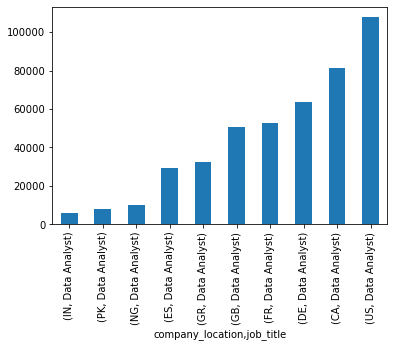

In [260]:
#Q_Three.groupby(['company_location','job_title'])['salary_in_usd'].mean().plot.bar(stacked=False)
# Don't seem to be able to order the chart without learning matplotlib.
#nvm
group_three.sort_values( ascending = True).plot.bar(stacked=False)

# Answer

The richer the country the better the pay

# What if the employee lives in a different country?

* This took a long time
* Using .loc it seems you can't compare the string values within two columns
* Was learning about using Regex in Pandas to find a solution 
* I realized Booleans in combination with creating a new column would work

In [211]:
Q_Three_sub = df[['experience_level', 'job_title', 'salary_in_usd', 'employee_residence', 'company_location']]
Q_Three_sub['dif_local'] = Q_Three_sub['employee_residence'] != Q_Three_sub['company_location']
Q_Three_sub 
#Q_Three_sub.loc[(sub_df['job_title'] == 'Data Analyst')]

<ipython-input-211-4e07243c1483>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q_Three_sub['dif_local'] = Q_Three_sub['employee_residence'] != Q_Three_sub['company_location']


,experience_level,job_title,salary_in_usd,employee_residence,company_location,dif_local
0,MI,Data Scientist,79833,DE,DE,False
1,SE,Machine Learning Scientist,260000,JP,JP,False
2,SE,Big Data Engineer,109024,GB,GB,False
3,MI,Product Data Analyst,20000,HN,HN,False
4,SE,Machine Learning Engineer,150000,US,US,False
...,...,...,...,...,...,...
602,SE,Data Engineer,154000,US,US,False
603,SE,Data Engineer,126000,US,US,False
604,SE,Data Analyst,129000,US,US,False
605,SE,Data Analyst,150000,US,US,False


# If company employees forigner

In [262]:
group_three_sub = Q_Three_sub.loc[(Q_Three_sub['dif_local'] == True) & (Q_Three_sub['job_title'] == 'Data Engineer')].groupby(['company_location','job_title'])['salary_in_usd'].mean()
group_three_sub.sort_values( ascending = False)

company_location  job_title    
GB                Data Engineer    71427.5
US                Data Engineer    58935.0
DE                Data Engineer    56388.5
Name: salary_in_usd, dtype: float64

# If company employees local 

In [263]:
#Q_Three = sub_df.loc[(sub_df['job_title'] == 'Data Analyst')]
group_three_sub_two= sub_df.loc[(sub_df['job_title'] == 'Data Engineer') & (sub_df['company_location'] == 'US') | (sub_df['job_title'] == 'Data Engineer') & (sub_df['company_location'] == 'GB') | (sub_df['job_title'] == 'Data Engineer') & (sub_df['company_location'] == 'DE')].groupby(['company_location','job_title'])['salary_in_usd'].mean()
group_three_sub_two.sort_values( ascending = False)

company_location  job_title    
US                Data Engineer    139724.682353
GB                Data Engineer     80305.750000
DE                Data Engineer     58186.750000
Name: salary_in_usd, dtype: float64

If I wanted to save this modified file?
CSV file:
``` python
sub_df.to_csv('mod_ds_salaries.csv')
```
Excel file:
``` python
sub_df.to_excel('mod_ds_salaries.xlsx')
```
Text file (Tab separated):
```python
sub_df.to_csv('mod_ds_salaries.txt', sep = '\t')
```

What if I expected to need to modify this file again in the future, and wanted to ensure that I wouldn't have to delete an extra reference column again?
Just add:
``` python
index = False
```
Example:
``` python
sub_df.to_csv('mod_ds_salaries.csv', index = False)
```